In [1]:
!pip install EMD-signal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
from PyEMD import EMD
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
dirpath = '/kaggle/working/signalfilesD'
os.mkdir(dirpath)

In [26]:
with open('datalabels_new.csv', 'w', newline='') as csvfile:
    fieldnames = ['ID', 'State']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

In [5]:
def compute_id(index):
    string = str(index).zfill(5)
    id_str = 'ID'+string
    return id_str

def sortbyindex(file):
    characters = list(file)
    idx = ''
    digitlist = [item for item in characters if item.isdigit()]
    for digit in digitlist:
        idx += digit
    return int(idx)

## Write Data

In [ ]:
# folder paths
folder_A = '/kaggle/input/bonn-dataset/Bonn Dataset/A' # Normal
folder_B = '/kaggle/input/bonn-dataset/Bonn Dataset/B' # Normal
folder_D = '/kaggle/input/bonn-dataset/Bonn Dataset/D'# Interictal
folder_E = '/kaggle/input/bonn-dataset/Bonn Dataset/E' # Ictal

In [30]:
destpath = '/kaggle/working/'

EEG_data = []
labels = []

folder_list1 = [folder_A, folder_B, folder_E]


for folder in folder_list1:
    txtfiles = sorted(os.listdir(folder), key=sortbyindex)

    for file in txtfiles:
        path = os.path.join(folder,file)
        signal = np.loadtxt(path)
        segments = np.array([signal[i:i+1024] for i in range (4)])
        EEG_data.extend(segments)

        if folder == folder_E:
            for k in range(len(segments)):
                labels.append(1)
                
        elif (folder== folder_A or folder==folder_B):
            for k in range(len(segments)):
                labels.append(0)
        

labels = np.array(labels).reshape(-1,1)
EEG_data = np.array(EEG_data)

#save .npy files
np.save(os.path.join(destpath, 'normal_ictal.npy'), EEG_data)
np.save(os.path.join(destpath, 'normal_ictal_labels.npy'), labels)


In [24]:
EEG_data = []
labels = []

folder_list2 = [folder_D, folder_E]


for folder in folder_list2:
    txtfiles = sorted(os.listdir(folder), key=sortbyindex)

    for file in txtfiles:
        path = os.path.join(folder,file)
        signal = np.loadtxt(path)
        segments = np.array([signal[i:i+1024] for i in range (4)])
        EEG_data.extend(segments)

        if folder == folder_E:
            for k in range(len(segments)):
                labels.append(1)
                
        elif (folder== folder_D):
            for k in range(len(segments)):
                labels.append(0)
        

labels = np.array(labels).reshape(-1,1)
EEG_data = np.array(EEG_data)

#save .npy files
np.save(os.path.join(destpath, 'interictal_ictal.npy'), EEG_data)
np.save(os.path.join(destpath, 'interictal_ictal_labels.npy'), labels)


300 3


In [31]:
# # import shutil

# shutil.make_archive('/kaggle/working/signalfilesD', 'zip', '/kaggle/working/signalfilesD')

'/kaggle/working/signalfilesD.zip'

In [6]:
data='/kaggle/working/normal_ictal.npy'
segment = np.load(data)[0]
emd = EMD()
IMFs = emd(segment)

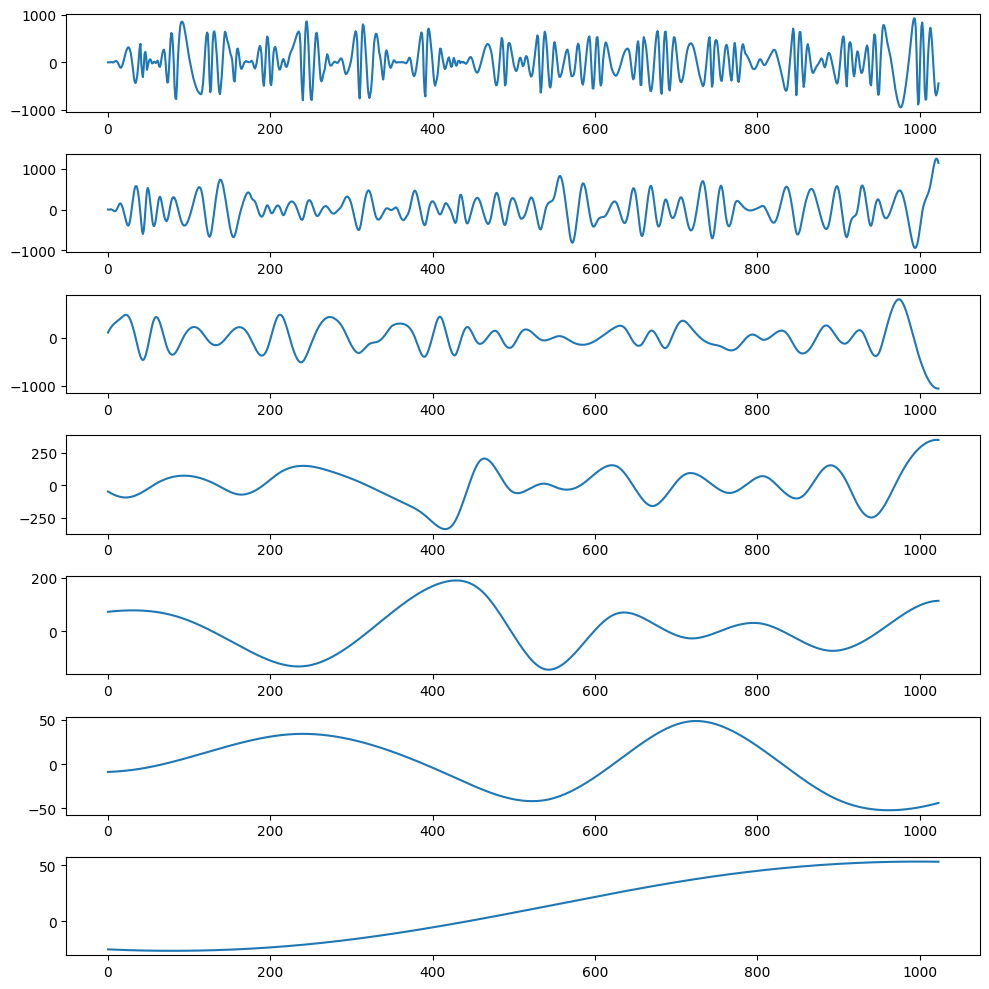

In [7]:
fig, ax = plt.subplots(IMFs.shape[0],1, figsize=(10,10))
for i in range (IMFs.shape[0]):
    ax[i].plot(IMFs[i,:])
plt.tight_layout()
plt.show()

7
